In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
# Dati di esempio
X = np.array([[1], [2], [3], [4], [5]])  # Ore di studio (reshape per sklearn)
y = np.array([10, 12, 15, 20, 22])       # Voti
N = 6
# Crea e addestra il modello
model = LinearRegression()
model.fit(X, y)

# Coefficienti del modello
print("Intercetta (b0):", model.intercept_)
print("Coefficiente (b1):", model.coef_[0])

# Previsione
predizione = model.predict([[N]])  # Predici voto per 6 ore di studio
print("Voto previsto per", N,"ore di studio:", predizione[0])


Intercetta (b0): 6.199999999999999
Coefficiente (b1): 3.2000000000000006
Voto previsto per 6 ore di studio: 25.400000000000002


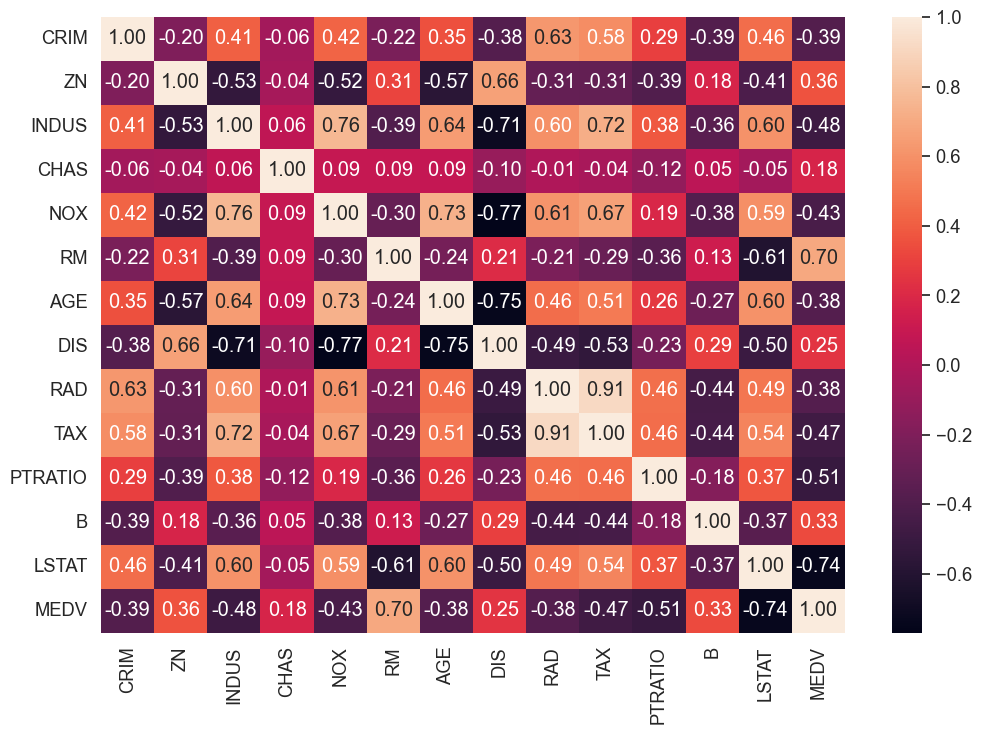

In [42]:
df = pd.read_csv("C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv")
plt.figure(figsize=(12, 8))  # Imposta le dimensioni della figura

corr = df.corr()                     # Pearson per tutte le coppie
corr_target = corr["TAX"].abs()   # Importanza assoluta rispetto al target
corr_target = corr_target.sort_values(ascending=False)
#print(corr_target)

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop("TAX", axis=1)
y = df["TAX"]
selector = SelectKBest(score_func=f_regression, k=5)  
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=X.columns)
scores.sort_values(ascending=False)


RAD        2435.038656
INDUS       544.896991
NOX         406.166226
CRIM        259.190294
LSTAT       211.836727
DIS         201.504027
AGE         173.872425
MEDV        141.761357
PTRATIO     135.906976
B           122.238121
ZN           55.347481
RM           46.995471
CHAS          0.639075
dtype: float64

In [44]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

model = Lasso(alpha=0.1)
model.fit(Xs, y)
importances = pd.Series(abs(model.coef_), index=X.columns)
importances.sort_values(ascending=False)


RAD        122.754988
INDUS       48.286884
ZN          19.944132
MEDV        15.542733
LSTAT        7.169877
CHAS         5.619249
NOX          5.058229
DIS          2.818437
AGE          2.606289
CRIM         2.156143
PTRATIO      1.904105
RM           0.749583
B            0.103353
dtype: float64

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


RAD        0.816043
INDUS      0.070485
NOX        0.038861
CRIM       0.032018
DIS        0.018860
PTRATIO    0.008145
ZN         0.004752
MEDV       0.003800
B          0.002647
LSTAT      0.001758
AGE        0.001742
RM         0.000772
CHAS       0.000117
dtype: float64

In [46]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rf, X, y, n_repeats=10, random_state=0)
perm_imp = pd.Series(res.importances_mean, index=X.columns)
perm_imp.sort_values(ascending=False)


RAD        1.352401
INDUS      0.082886
NOX        0.078065
DIS        0.029702
CRIM       0.009538
PTRATIO    0.004501
B          0.003693
MEDV       0.003079
ZN         0.002905
LSTAT      0.001368
AGE        0.001157
RM         0.000432
CHAS       0.000048
dtype: float64

C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


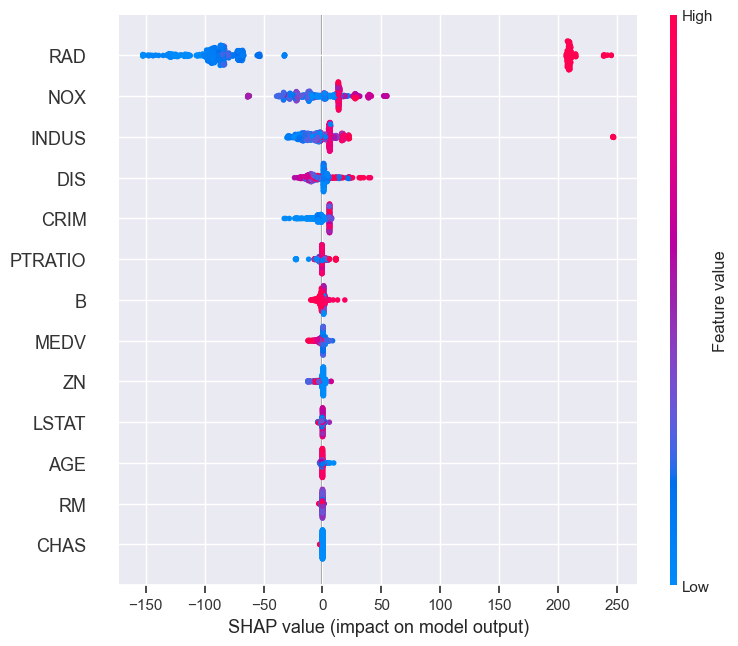

In [ ]:
import shap

explainer = shap.Explainer(rf, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true: valori reali
# y_pred: valori previsti dal modello
y_true = [18, 21, 25, 28, 30]
y_pred = [17.5, 20.5, 25.2, 27.8, 30.3]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 0.13399999999999995
RMSE: 0.36606010435446246
MAE: 0.33999999999999986
R²: 0.9931069958847737
